#📌 Extracão

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [ ]:
api_url= 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(api_url)
dados_json = response.json()


#🔧 Transformação

In [ ]:
df = pd.json_normalize(dados_json) #normalizando os dados
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Verificando Inconsistências nos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Vericando se há dados duplicados


In [ ]:
qtd_duplicados = df.duplicated().sum() #verificando dados duplicadods
print(f"Quantidade de numeros duplicados: {qtd_duplicados}")#Não há dados duplicados

Quantidade de numeros duplicados: 0


Vericando se há dados nulos

In [ ]:
qtd_nulos = df.isnull().sum()
print(f"Quantidade de numeros nulos: {qtd_nulos}")#Não há dados duplicados#Não há dados nulos

Quantidade de numeros nulos: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Vericando se há dados vazios

In [ ]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum() #há dados vazios, vamos excluir esses dados no Churn.

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Tratando os dados da Churn e account.Charges.Total

In [ ]:
df = df[df['Churn'].str.strip() != ''] #retirando os dados vazios Churn
print("Números de filas depois da eliminação dos dados vazios em 'Churn'", len(df), " linhas.")

Números de filas depois da eliminação dos dados vazios em 'Churn' 7043  linhas.


In [ ]:
df = df[df['account.Charges.Total'].str.strip() != ''] #retirando os dados vazios de account.Charges.Total
print("Números de filas depois da eliminação dos dados vazios em 'Churn'", len(df), " linhas.")


Números de filas depois da eliminação dos dados vazios em 'Churn' 7032  linhas.


Corrigindos erros de tipo dos dados

In [ ]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'].replace(' ', pd.NA)).fillna(0) #mudado o tipo da coluna 'account.Charges.Total' de object para float

Criando a coluna de contas diárias

In [ ]:
df['contas diárias'] = (df['account.Charges.Monthly'] / 30).round(2)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,contas diárias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80



Padronização, transformação de Dados e correção de dados nulos

In [ ]:
#Padronizando valores de Yes ou No para 1 e 0, respectivamente.
df = df.replace({'Yes': 1, 'No': 0})
df.head()

/tmp/ipython-input-1513732967.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,contas diárias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [ ]:
#Renomeando colunas
df = df.rename(columns={'Churn': 'Evasao'})
df = df.rename(columns={'customer.gender': 'Genero'})
df = df.rename(columns={'customer.tenure': 'Meses.Contrato'})
df = df.rename(columns={'account.Charges.Monthly': 'Total.Gasto.Mes'})
df = df.rename(columns={'account.Charges.Total': 'Gasto.Total'})
df = df.rename(columns={'account.Contract': 'Tipo.Contrato'})
df = df.rename(columns={'account.PaperlessBilling': 'Tipo.Fatura'})

In [ ]:
#ajustando dados nulos na coluna
df['Evasao'] = pd.to_numeric(df['Evasao'].replace(' ', pd.NA)).fillna(0)
df['Gasto.Total'] = pd.to_numeric(df['Gasto.Total'].replace(' ', pd.NA)).fillna(0)
df['phone.MultipleLines'] = pd.to_numeric(df['phone.MultipleLines'].replace('No phone service', pd.NA)).fillna(0)
df['internet.OnlineSecurity'] = pd.to_numeric(df['internet.OnlineSecurity'].replace('No internet service', pd.NA)).fillna(0)
df['internet.OnlineBackup'] = pd.to_numeric(df['internet.OnlineBackup'].replace('No internet service', pd.NA)).fillna(0)
df['internet.DeviceProtection'] = pd.to_numeric(df['internet.DeviceProtection'].replace('No internet service', pd.NA)).fillna(0)
df['internet.TechSupport'] = pd.to_numeric(df['internet.TechSupport'].replace('No internet service', pd.NA)).fillna(0)
df['internet.StreamingTV'] = pd.to_numeric(df['internet.StreamingTV'].replace('No internet service', pd.NA)).fillna(0)
df['internet.StreamingMovies'] = pd.to_numeric(df['internet.StreamingMovies'].replace('No internet service', pd.NA)).fillna(0)

#ajustando dados dentro da coluna
df['internet.InternetService'] = df['internet.InternetService'].replace({0: 'sem serviço internet'})
print(df['internet.InternetService'].unique())

['DSL' 'Fiber optic' 'sem serviço internet']


In [ ]:
#Convetendo algumas coluna para inteiro

df = df.astype({
    'Evasao': 'int64',
    'customer.SeniorCitizen': 'int64',
    'Tipo.Fatura': 'int64',
    'phone.MultipleLines': 'int64',
    'internet.OnlineSecurity': 'int64',
    'internet.OnlineBackup': 'int64',
    'internet.DeviceProtection': 'int64',
    'internet.TechSupport': 'int64',
    'internet.StreamingTV': 'int64',
    'internet.StreamingMovies': 'int64'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Evasao                     7032 non-null   int64  
 2   Genero                     7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   Meses.Contrato             7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  internet.TechSupport       7032 non-null   int64  
 1

Fazendo correções no tipo de dados

#📊 Carga e análise

Análise Descritiva

In [ ]:
round(df.describe(),2)
#os 50% se refere a mediana

,Evasao,customer.SeniorCitizen,customer.Partner,customer.Dependents,Meses.Contrato,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Tipo.Fatura,Total.Gasto.Mes,Gasto.Total,contas diárias
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.0,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.27,0.16,0.48,0.30,32.42,0.9,0.42,0.29,0.34,0.34,0.29,0.38,0.39,0.59,64.80,2283.30,2.16
std,0.44,0.37,0.50,0.46,24.55,0.3,0.49,0.45,0.48,0.48,0.45,0.49,0.49,0.49,30.09,2266.77,1.00
min,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.59,401.45,1.19
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,70.35,1397.48,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,89.86,3794.74,2.99
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,118.75,8684.80,3.96


Distribuição da Evasão

In [ ]:
#Sairam da empresa
evasao_sim = df[df['Evasao'] == 1]
evasao_sim

,customerID,Evasao,Genero,customer.SeniorCitizen,customer.Partner,customer.Dependents,Meses.Contrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Tipo.Contrato,Tipo.Fatura,account.PaymentMethod,Total.Gasto.Mes,Gasto.Total,contas diárias
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
18,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,...,1,0,0,1,One year,0,Credit card (automatic),62.70,2791.50,2.09
19,0023-HGHWL,1,Male,1,0,0,1,0,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,1,Male,1,0,0,21,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),96.80,2030.30,3.23
7246,9965-YOKZB,1,Male,1,0,0,9,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,83.85,790.15,2.80
7260,9985-MWVIX,1,Female,0,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.34
7261,9986-BONCE,1,Female,0,0,0,4,1,0,sem serviço internet,...,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.95,85.50,0.70


In [ ]:
#Não sairam da empresa
evasao_nao = df[df['Evasao'] == 0]
evasao_nao

,customerID,Evasao,Genero,customer.SeniorCitizen,customer.Partner,customer.Dependents,Meses.Contrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Tipo.Contrato,Tipo.Fatura,account.PaymentMethod,Total.Gasto.Mes,Gasto.Total,contas diárias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.31
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.66
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,9979-RGMZT,0,Female,0,0,0,7,1,0,Fiber optic,...,0,0,1,1,One year,1,Mailed check,94.05,633.45,3.14
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


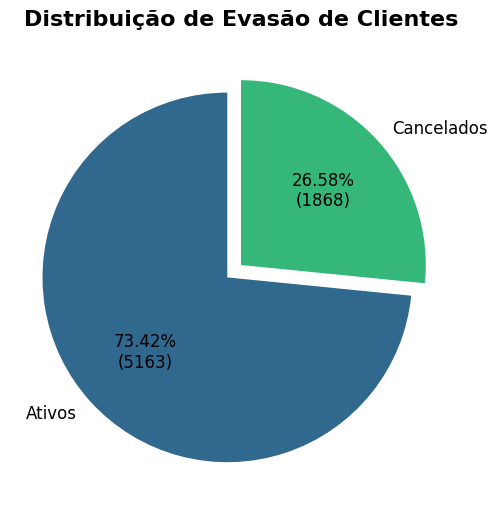

In [ ]:

churn_counts = df['Evasao'].value_counts()
total_customers = churn_counts.sum()
labels = ['Ativos', 'Cancelados']

colors = sns.color_palette('viridis', 2)

def func(pct, allvals):
    absolute = int(pct/100.*allvals.sum())
    return "{:.2f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(6, 6))
plt.pie(churn_counts,
        labels=labels,
        colors=colors,
        autopct=lambda pct: func(pct, churn_counts),
        startangle=90,
        explode=(0.1, 0),
        textprops={'fontsize': 12} )

plt.title('Distribuição de Evasão de Clientes', fontsize=16, fontweight='bold')
plt.show()



Contagem de Evasão por Variáveis Categóricas

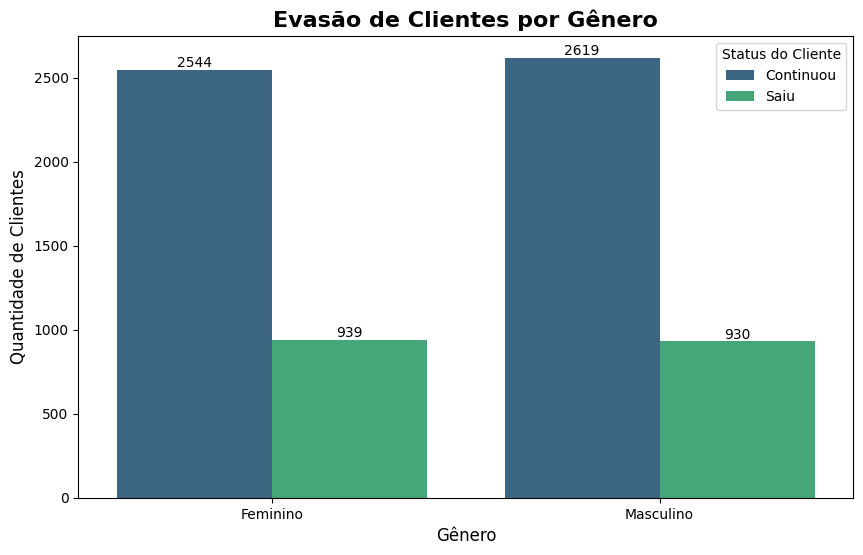

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Genero', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Evasão de Clientes por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])

plt.xticks([0, 1], ['Feminino', 'Masculino'])

plt.show()

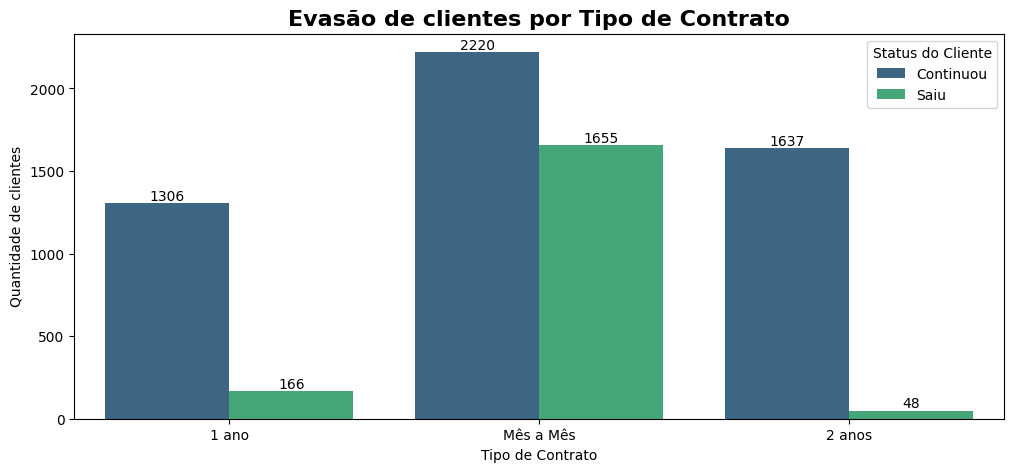

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.countplot(x='Tipo.Contrato', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Evasão de clientes por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.xlabel("Tipo de Contrato")
plt.ylabel("Quantidade de clientes")

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])
plt.xticks([0, 1, 2], ['1 ano', 'Mês a Mês', '2 anos'])

plt.show()

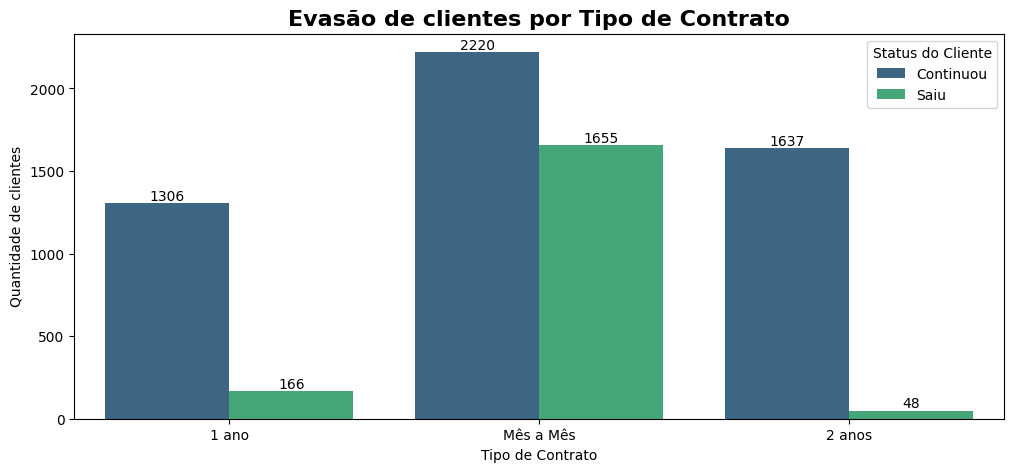

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.countplot(x='Tipo.Contrato', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Evasão de clientes por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.xlabel("Tipo de Contrato")
plt.ylabel("Quantidade de clientes")

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])
plt.xticks([0, 1, 2], ['1 ano', 'Mês a Mês', '2 anos'])

plt.show()

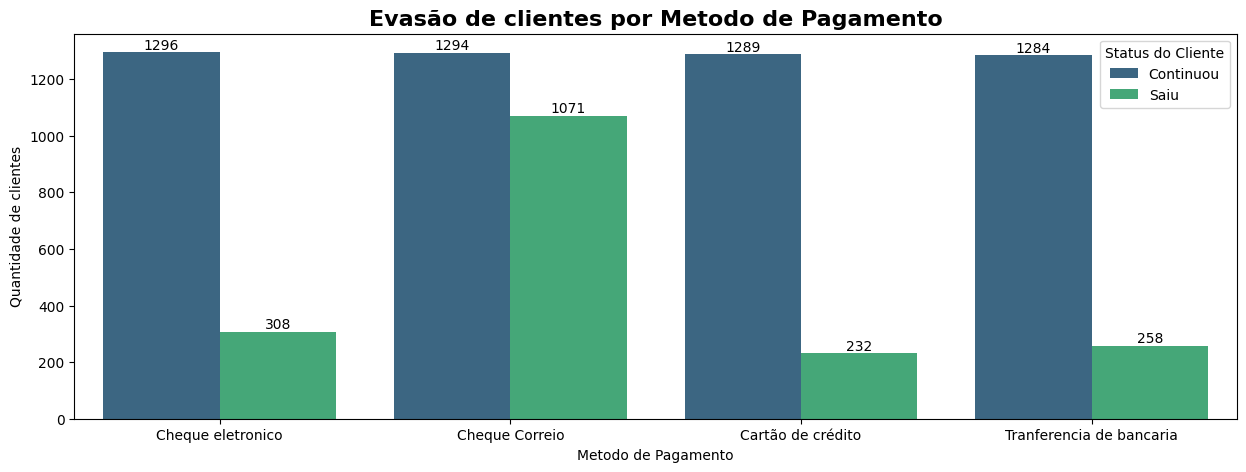

In [ ]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x='account.PaymentMethod', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Evasão de clientes por Metodo de Pagamento', fontsize=16, fontweight='bold')
plt.xlabel("Metodo de Pagamento")
plt.ylabel("Quantidade de clientes")

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])
plt.xticks([0, 1, 2, 3 ], ['Cheque eletronico', 'Cheque Correio', 'Cartão de crédito', 'Tranferencia de bancaria'])

plt.show()

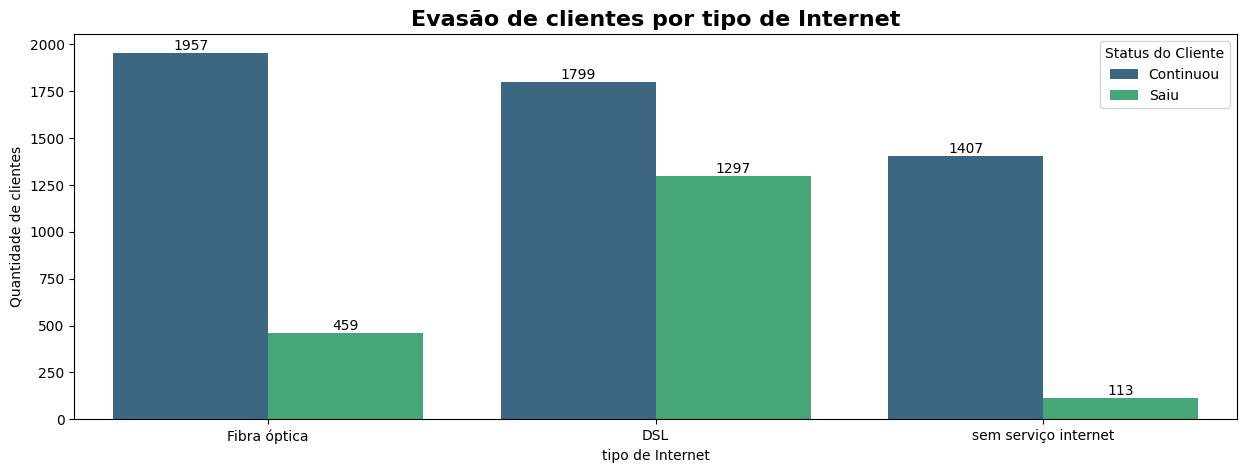

In [ ]:


plt.figure(figsize=(15,5))

ax = sns.countplot(x='internet.InternetService', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Evasão de clientes por tipo de Internet', fontsize=16, fontweight='bold')
plt.xlabel("tipo de Internet")
plt.ylabel("Quantidade de clientes")

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])
plt.xticks([0, 1, 2 ], ['Fibra óptica', 'DSL', 'sem serviço internet'])

plt.show()

Contagem de Evasão por Variáveis Numéricas

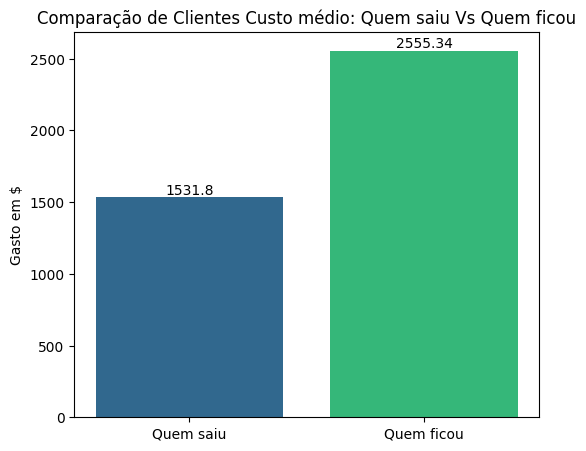

In [ ]:
#Gasto médio
total_gasto_S = evasao_sim['Gasto.Total'].mean().round(2)
total_gasto_F = evasao_nao['Gasto.Total'].mean().round(2)
colors = sns.color_palette('viridis', 2)

categorias = ['Quem saiu', 'Quem ficou']
valores = [total_gasto_S, total_gasto_F]

plt.figure(figsize=(6,5))
barras = plt.bar(categorias, valores, color=colors)
plt.bar_label(barras)
plt.title("Comparação de Clientes Custo médio: Quem saiu Vs Quem ficou")
plt.ylabel("Gasto em $")
plt.show()

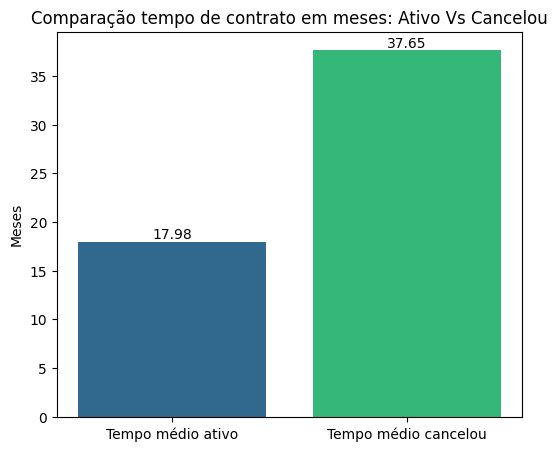

In [ ]:
#tempo médio
tempo_medioF = evasao_sim['Meses.Contrato'].mean().round(2)
tempo_medioS = evasao_nao['Meses.Contrato'].mean().round(2)

categorias = ['Tempo médio ativo', 'Tempo médio cancelou']
valores = [tempo_medioF, tempo_medioS]
colors = sns.color_palette('viridis', 2)

plt.figure(figsize=(6,5))
barras = plt.bar(categorias, valores, color=colors)
plt.bar_label(barras)
plt.title("Comparação tempo de contrato em meses: Ativo Vs Cancelou")
plt.ylabel("Meses")
plt.show()

Mesclando informações dos graficos

/tmp/ipython-input-802150226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='internet.InternetService', y='Meses.Contrato', data=quem_saiu, palette='viridis')


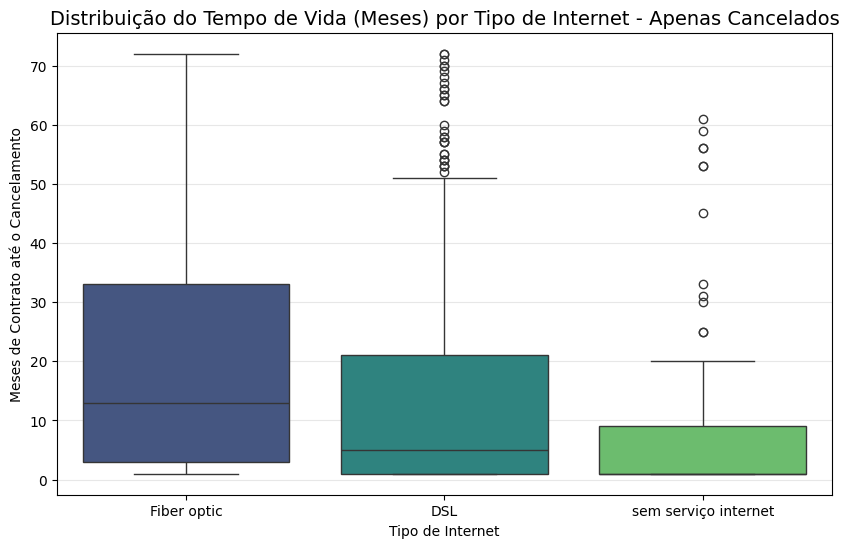

In [ ]:
quem_saiu = df[df['Evasao'] == 1]

plt.figure(figsize=(10, 6))

sns.boxplot(x='internet.InternetService', y='Meses.Contrato', data=quem_saiu, palette='viridis')

plt.title('Distribuição do Tempo de Vida (Meses) por Tipo de Internet - Apenas Cancelados', fontsize=14)
plt.xlabel('Tipo de Internet')
plt.ylabel('Meses de Contrato até o Cancelamento')
plt.grid(True, axis='y', alpha=0.3)

plt.show()

In [ ]:
print(df['internet.InternetService'].unique())

['DSL' 'Fiber optic' 'sem serviço internet']


/tmp/ipython-input-3292768086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=media_tempo, x='Tipo.Contrato', y='Meses.Contrato',


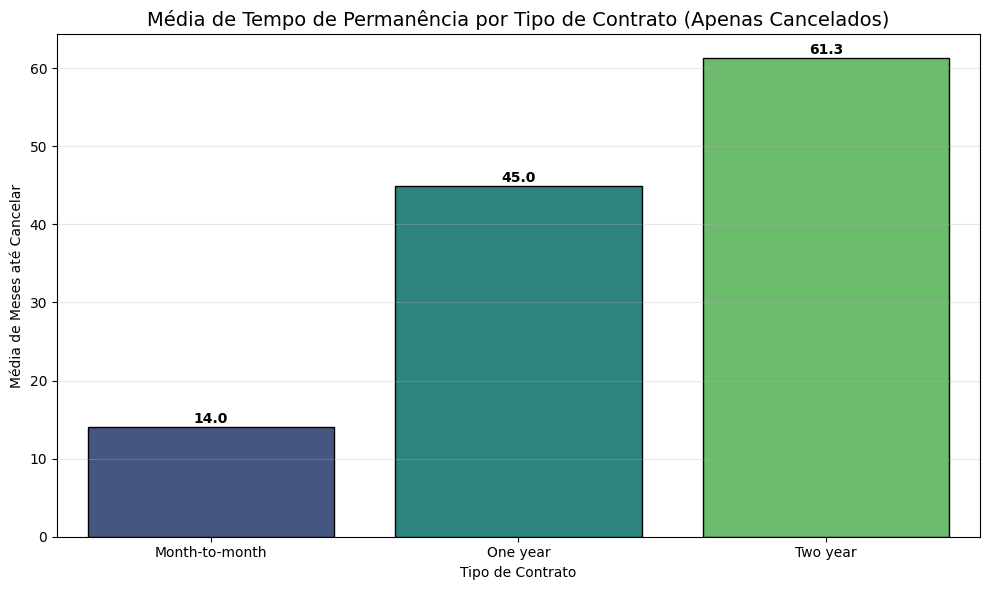

In [ ]:
cancelados = df[df['Evasao'] == 1].copy()

media_tempo = cancelados.groupby('Tipo.Contrato')['Meses.Contrato'].mean().reset_index()

plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=media_tempo, x='Tipo.Contrato', y='Meses.Contrato',
                      palette='viridis', edgecolor='black')

for i in range(len(media_tempo)):
    valor = media_tempo.iloc[i]['Meses.Contrato']
    grafico.text(i, valor + 0.5, f'{valor:.1f}',
                 color='black', ha="center", fontweight='bold')

plt.title('Média de Tempo de Permanência por Tipo de Contrato (Apenas Cancelados)', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Média de Meses até Cancelar')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

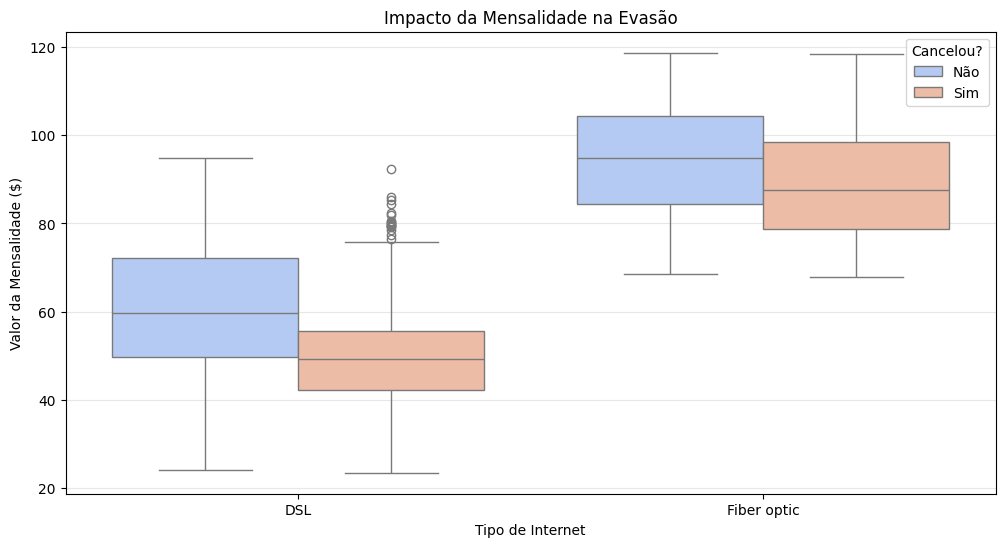

In [ ]:
df_filtro = df[df['internet.InternetService'].isin(['Fiber optic', 'DSL'])].copy()

df_filtro['Evasao_Label'] = df_filtro['Evasao'].map({0: 'Não', 1: 'Sim'})

plt.figure(figsize=(12, 6))

sns.boxplot(data=df_filtro,
            x='internet.InternetService',
            y='Total.Gasto.Mes',
            hue='Evasao_Label',
            palette='coolwarm')

plt.title('Impacto da Mensalidade na Evasão')
plt.xlabel('Tipo de Internet')
plt.ylabel('Valor da Mensalidade ($)')
plt.legend(title='Cancelou?')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

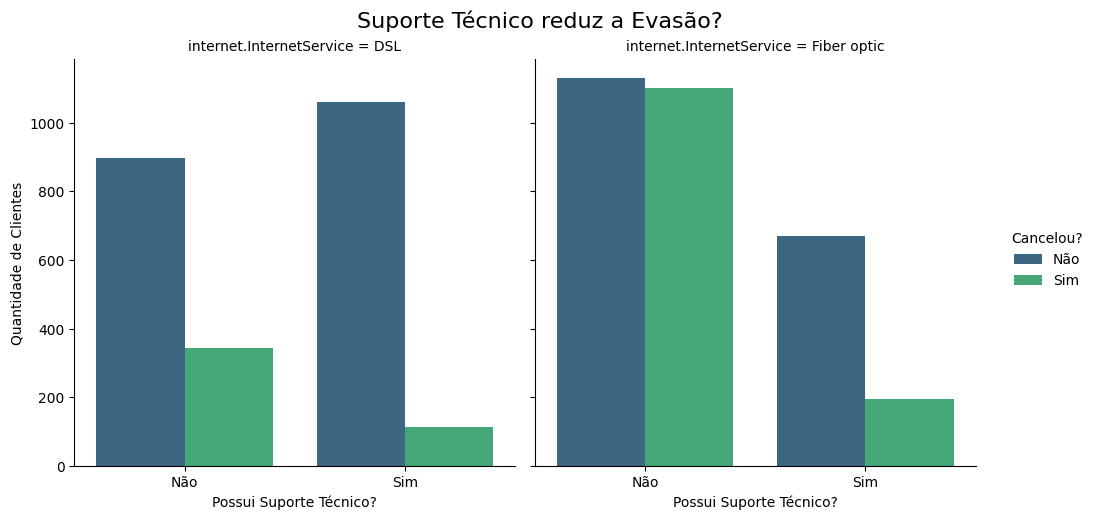

In [ ]:
g = sns.catplot(
    data=df_filtro,
    x='internet.TechSupport',
    hue='Evasao_Label',
    col='internet.InternetService',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1
)

g.fig.suptitle('Suporte Técnico reduz a Evasão?', y=1.03, fontsize=16)
g.set_axis_labels("Possui Suporte Técnico?", "Quantidade de Clientes")
g._legend.set_title("Cancelou?")
plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()

#📄Relatorio Final

#Introdução
 Este relatorio tem como objetivo investigar e indicar dados sobre o Churn(Evasão) de clientes da empresa de telecomunicações Telecom X, essa evasão de dados estar resultando em grande prezuizo na empresa visto que a perda de cliente diminui o faturamento resultando assim em menos lucro para empresa, então a produção de relatorio irá abordar seus principais problemas e apontar sugestões de melhorias. A base de dados para abordar esse problema vem desse link 'https://github.com/alura-cursos/challenge2-data-science/blob/main/TelecomX_Data.json'.

#Limpeza e tratamento de dados
A base de dados veio com seus dados alinhados, o que dificulta a visualização dos dados, foi usado o metodo 'pd.json_normalize' para mudar seu formato de exibição para tabular, o que facilitar a leitura da mesma, para verficiar se há dados duplicados foi usado 'duplicated()' e 'isnull()' para procurar se há dados nulos, alem disso foi modificado os tipos de dados, alguns ficaram como object, mas outro houve a mudança para int e float, por fim ocorreu a rescrita de algumas colunas para facilitar o entedimento.

#Análise Exploratória de Dados
Após o tramento e limpeza dos dados, foi realizado a analise desse dados, e cerca de 25% dos clientes ou 1869 pessoas sairam da empresa, como visto no grafico abaixo:

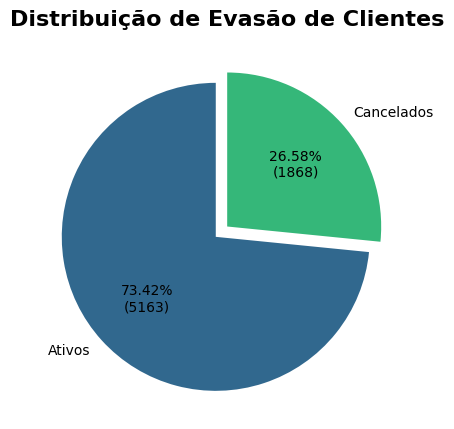

In [ ]:
#@title Grafico da evasão de clientes
churn_counts = df['Evasao'].value_counts()
total_customers = churn_counts.sum()
labels = ['Ativos', 'Cancelados']
colors = sns.color_palette('viridis', 2)

def func(pct, allvals):
    absolute = int(pct/100.*allvals.sum())
    return "{:.2f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(5, 5))
plt.pie(churn_counts,
        labels=labels,
        colors=colors,
        autopct=lambda pct: func(pct, churn_counts),
        startangle=90,
        explode=(0.1, 0)
       )

plt.title('Distribuição de Evasão de Clientes', fontsize=16, fontweight='bold')
plt.show()


Isso realmente é um dado preocupante, e apos investigações crie alguns grafico como

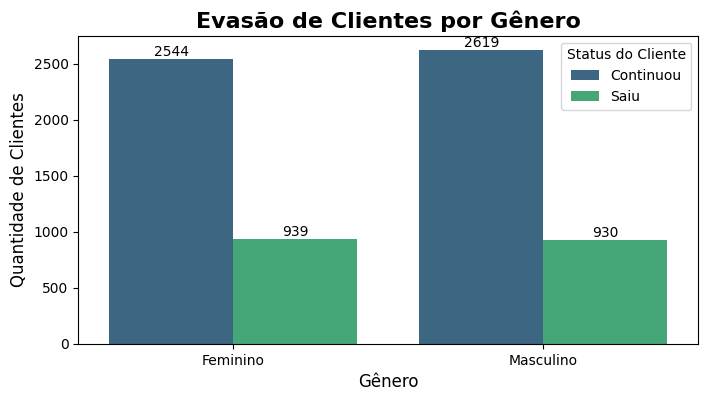

In [ ]:
# @title Evasão de clientes por Gênero
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

ax = sns.countplot(x='Genero', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Evasão de Clientes por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])

plt.xticks([0, 1], ['Feminino', 'Masculino'])

plt.show()

Aqui vemos que não teve diferença de cancelamento entre os generos masculino e feminino

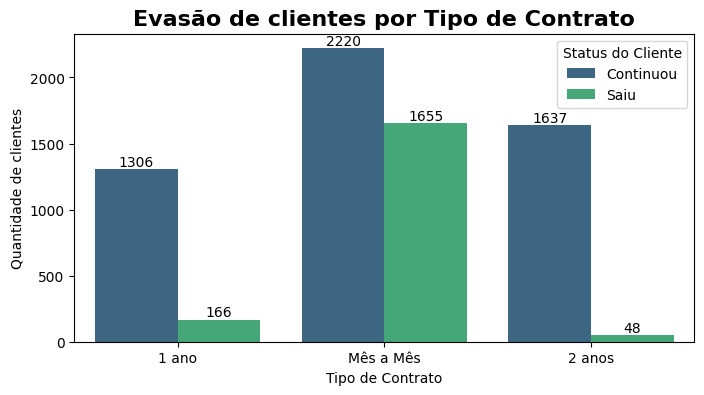

In [ ]:
# @title Evasão de clientes por Tipo de Contrato
plt.figure(figsize=(8,4))

ax = sns.countplot(x='Tipo.Contrato', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
  ax.bar_label(container) #numeracao das barras

plt.title('Evasão de clientes por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.xlabel("Tipo de Contrato")
plt.ylabel("Quantidade de clientes")

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])
plt.xticks([0, 1, 2], ['1 ano', 'Mês a Mês', '2 anos'])

plt.show()

Percebe-se que a maioria dos clientes que saiu foi do tipo de contrato de Mês a Mês para, se comparar em relação ao segundo que mais saiu que foi de 1 ano de contrato, da uma diferença de dez vezes maior, então as proximais ações deve ser focadas nos contrato do tipo mes a mes, que saiu mais de 40% de sua base

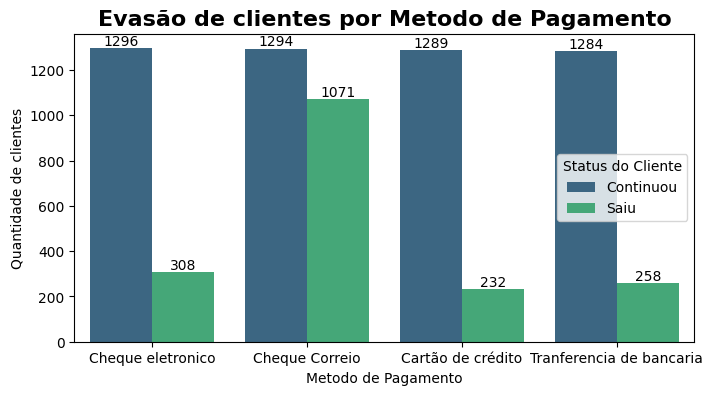

In [ ]:
# @title Evasão de clientes por Metodo de Pagamento
plt.figure(figsize=(8,4))

ax = sns.countplot(x='account.PaymentMethod', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Evasão de clientes por Metodo de Pagamento', fontsize=16, fontweight='bold')
plt.xlabel("Metodo de Pagamento")
plt.ylabel("Quantidade de clientes")

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])
plt.xticks([0, 1, 2, 3 ], ['Cheque eletronico', 'Cheque Correio', 'Cartão de crédito', 'Tranferencia de bancaria'])

plt.show()

Nota-se que o metodo de pagamento de cheque Correio(Mailed check) foi o que teve a saide de clientes, este era o metodo disparadamente maior que os outros, mas depois da evasão desses clientes ficou no mesmo patamar que os outros, de maior metodo de pagamento da telecom X para ficar na media, uma queda de 43%.

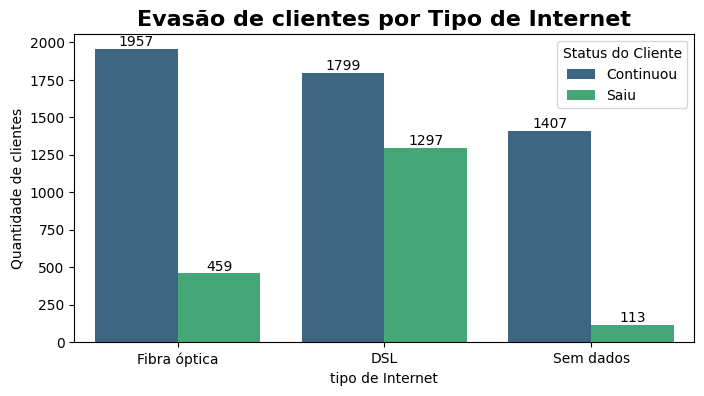

In [ ]:
# @title Evasão de clientes por Tipo de Internet
plt.figure(figsize=(8,4))

ax = sns.countplot(x='internet.InternetService', hue='Evasao', data=df, palette='viridis')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Evasão de clientes por Tipo de Internet', fontsize=16, fontweight='bold')
plt.xlabel("tipo de Internet")
plt.ylabel("Quantidade de clientes")

plt.legend(title='Status do Cliente', labels=['Continuou', 'Saiu'])
plt.xticks([0, 1, 2 ], ['Fibra óptica', 'DSL', 'Sem dados'])

plt.show()

Embora a internet DSL não seja a maioria da base, ela é responsável por 40% da evasão total. Isso levanta a hipótese: será um problema de qualidade? Sabemos que a fibra óptica é mais estável e rápida, o que pode estar tornando a tecnologia DSL obsoleta para os clientes.

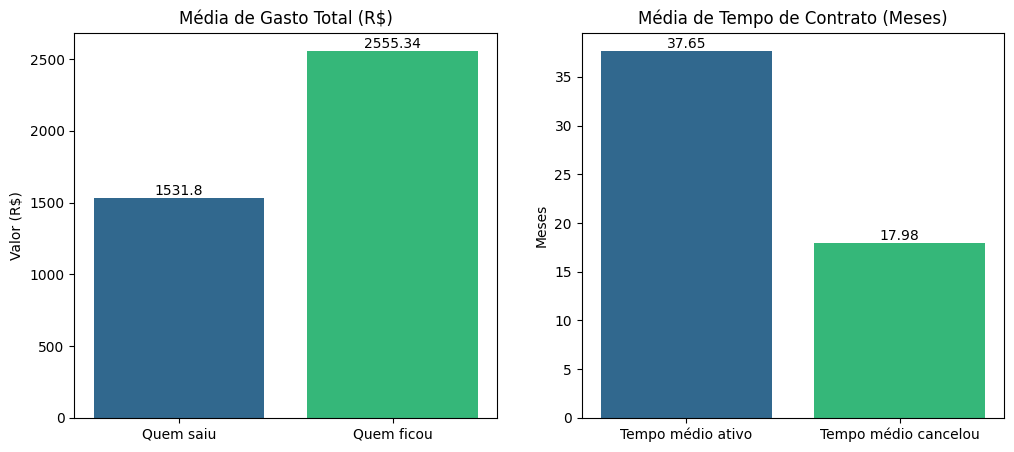

In [ ]:
media_gasto_saiu = evasao_sim['Gasto.Total'].mean().round(2)
media_gasto_ficou = evasao_nao['Gasto.Total'].mean().round(2)

media_tempo_ficou = evasao_nao['Meses.Contrato'].mean().round(2)
media_tempo_saiu = evasao_sim['Meses.Contrato'].mean().round(2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cmap = plt.get_cmap('viridis') # This line is not needed for the fix, but kept if user intends to use cmap elsewhere

categorias_gasto = ['Quem saiu', 'Quem ficou']
valores_gasto = [media_gasto_saiu, media_gasto_ficou]
colors = sns.color_palette('viridis', 2)


# Corrected: Pass explicit colors, matching the colors used in the second plot for consistency
barras1 = axes[0].bar(categorias_gasto, valores_gasto, color=colors)
axes[0].bar_label(barras1)
axes[0].set_title("Média de Gasto Total (R$)")
axes[0].set_ylabel("Valor (R$)")

categorias_tempo = ['Tempo médio ativo', 'Tempo médio cancelou']
valores_tempo = [media_tempo_ficou, media_tempo_saiu]

barras2 = axes[1].bar(categorias_tempo, valores_tempo, color=colors)
axes[1].bar_label(barras2)
axes[1].set_title("Média de Tempo de Contrato (Meses)")
axes[1].set_ylabel("Meses")

plt.show()

Gostaria de analisar esses dois graficos juntos, ele apresentar um dado muito interresante,pois ambos os graficos apontam para que as pessoas que estão saindo são ficam menos tempo, logo tem um valor medio de gasto menor. então é necessario dar foco para os clientes que estão chegando, fazer a retenção desse cliente

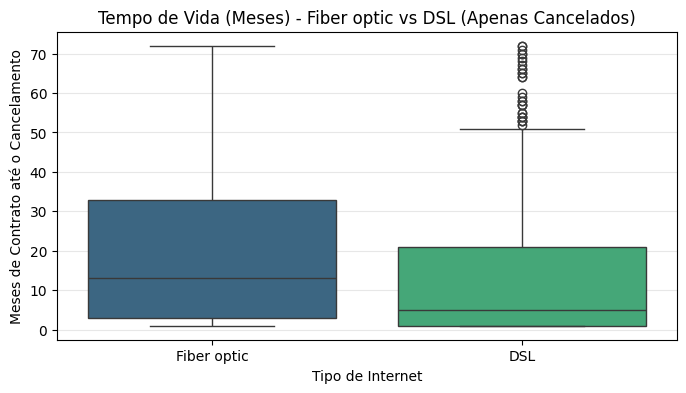

In [ ]:
# @title Tempo de Vida (Meses) - Fiber optic vs DSL (Apenas Cancelados)
tipos_desejados = ['Fiber optic', 'DSL']


cancelados_internet = df[
    (df['Evasao'] == 1) &
    (df['internet.InternetService'].isin(tipos_desejados))
].copy()

plt.figure(figsize=(8, 4))
sns.boxplot(data=cancelados_internet, x='internet.InternetService', y='Meses.Contrato',
            hue='internet.InternetService',
            palette='viridis',
            legend=False)

plt.title('Tempo de Vida (Meses) - Fiber optic vs DSL (Apenas Cancelados)')
plt.xlabel('Tipo de Internet')
plt.ylabel('Meses de Contrato até o Cancelamento')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Nessa analise fiz, a junção apenas dos clientes que cancelaram, é notavel que a internet do tipo DSL possui cancelamentos mais cedo que a fibra óptica, tendo sua media em torno de 5 meses e apenas alguns caso raros de clientes que mantiveram por mais de 5 a 6 anos

/tmp/ipython-input-3175748498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=media_tempo, x='Tipo.Contrato', y='Meses.Contrato',


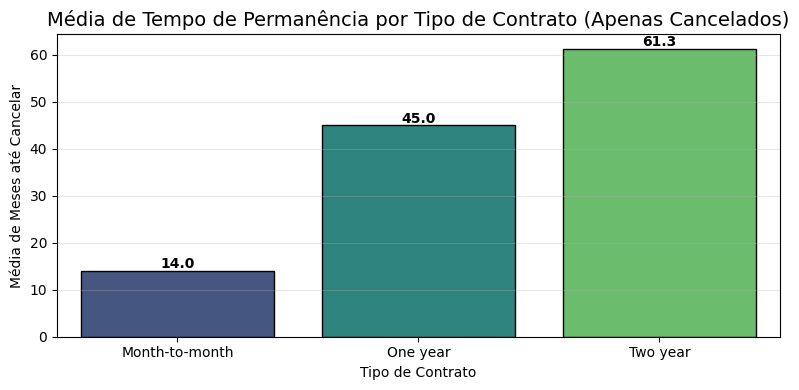

In [ ]:
# @title Média de Tempo de Permanência por Tipo de Contrato (Apenas Cancelados)
cancelados = df[df['Evasao'] == 1].copy()

media_tempo = cancelados.groupby('Tipo.Contrato')['Meses.Contrato'].mean().reset_index()

plt.figure(figsize=(8, 4))
grafico = sns.barplot(data=media_tempo, x='Tipo.Contrato', y='Meses.Contrato',
                      palette='viridis', edgecolor='black')

for i in range(len(media_tempo)):
    valor = media_tempo.iloc[i]['Meses.Contrato']
    grafico.text(i, valor + 0.5, f'{valor:.1f}',
                 color='black', ha="center", fontweight='bold')

plt.title('Média de Tempo de Permanência por Tipo de Contrato (Apenas Cancelados)', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Média de Meses até Cancelar')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Aqui nesse grafico vemos a media de cancelamento em meses dos tipos de contratos, e com visto em graficos anteriores o contrato do tipo mes a mes possui a maior taxa de cancelamento e tambem a menor media de permanecia, de 1 anos e 2 meses, enquanto do contrato do tipo de 1 chega em media a 3 anos 9 meses 2 anos com mais de 5 anos

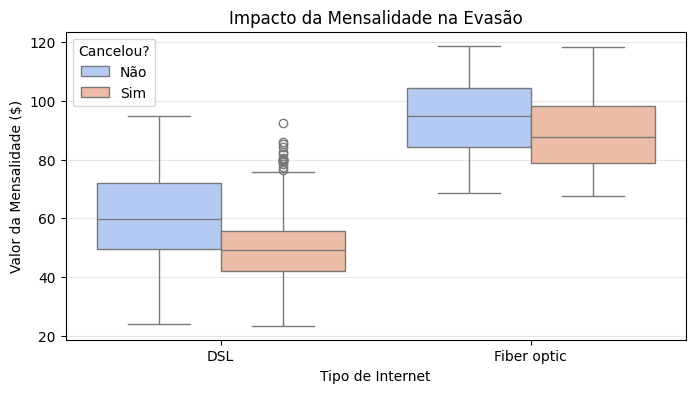

In [ ]:
# @title Impacto da Mensalidade na Evasão
df_filtro = df[df['internet.InternetService'].isin(['Fiber optic', 'DSL'])].copy()

df_filtro['Evasao_Label'] = df_filtro['Evasao'].map({0: 'Não', 1: 'Sim'})

plt.figure(figsize=(8, 4))

sns.boxplot(data=df_filtro,
            x='internet.InternetService',
            y='Total.Gasto.Mes',
            hue='Evasao_Label',  # Usamos a nova coluna aqui
            palette='coolwarm')

plt.title('Impacto da Mensalidade na Evasão')
plt.xlabel('Tipo de Internet')
plt.ylabel('Valor da Mensalidade ($)')
plt.legend(title='Cancelou?') # Título da legenda mais amigável
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Ao analisarmos o impacto financeiro, notamos um padrão interessante: embora a Fibra Óptica tenha mensalidades mais altas, a maior taxa de cancelamento proporcional ocorre na DSL, especialmente nos planos mais baratos (média de $50). Isso sugere que o cliente de DSL cancela por insatisfação técnica, enquanto o de Fibra pode cancelar por preço.

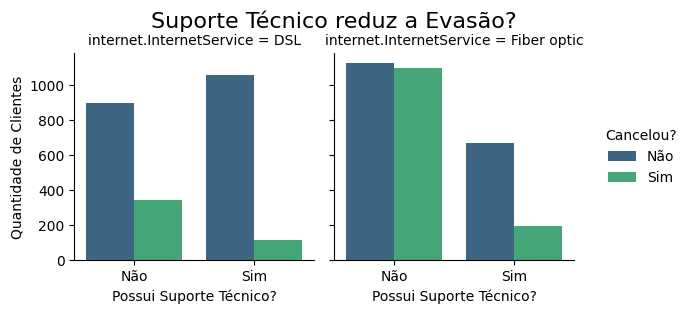

In [ ]:
# @title Suporte Técnico reduz a Evasão?
g = sns.catplot(
    data=df_filtro,
    x='internet.TechSupport',
    hue='Evasao_Label',
    col='internet.InternetService',
    kind='count',
    palette='viridis',
    height=3,
    aspect=1
)

g.fig.suptitle('Suporte Técnico reduz a Evasão?', y=1.03, fontsize=16)
g.set_axis_labels("Possui Suporte Técnico?", "Quantidade de Clientes")
g._legend.set_title("Cancelou?")
plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()

Aqui vemos que a influencia do suporte técnico faz diferença, mais principalmente, na internet do tipo Fibra optica, sendo possivelmente a maioria dos cancelamentos sendo resultado da falta de suporte tecnico, enquanto tambem na Dsl há um indice relativamente alto

#Conclusões e Insights
A análise dos dados revelou que a evasão (*Churn*) na TelecomX não é um evento isolado, mas o resultado de uma combinação de fatores críticos. Identificamos que a empresa enfrenta desafios tanto na tecnologia legada (DSL) quanto na retenção de novos entrantes.

### 1. O Perfil do Cliente de Risco
Os dados mostram que o cliente mais propenso ao cancelamento possui essas características:
* **Recém-chegado:** Possui contrato do tipo "Mensal" e pouco tempo de casa.
* **Sensível à Tecnologia:** Usuários de DSL (possível obsolescência) e Fibra Óptica (alta sensibilidade a preço) lideram as saídas.
* **Desprotegido:** A falta de serviços de valor agregado, como **Suporte Técnico**, aumenta muito a chance de saída.

### 2. O Fator Fidelidade
A correlação entre tempo de contrato e retenção é forte. Clientes com contratos de 1 ou 2 anos mostram-se se mostram muito mais estáveis, indicando que a estratégia de migração de base (do mensal para o anual) é essencial para a saúde financeira da empresa.

# Recomendação Estratégica
Com base nos insights, sugerem-se as seguintes ações:
1.  **Ação de Curto Prazo:** Focar em campanhas preventivas para clientes nos primeiros 6 meses de vida (fase crítica).
2.  **Valor Agregado:** Incentivar a contratação de pacotes com **Suporte Técnico** incluso, criando uma barreira de saída baseada na qualidade do serviço.
3.  **Atualização Tecnológica:** Para os clientes de DSL, oferecer migração facilitada para Fibra Óptica (tecnologia atual) com descontos nos primeiros meses, evitando que eles migrem para a concorrência por obsolescência.

#Extra: Análise de Correlação entre Variáveis

In [ ]:
colunas_servicos = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

df['Qtd.Servicos'] = df[colunas_servicos].apply(lambda x: x.astype(str).str.contains('Yes|Sim', case=False).sum(), axis=1)

df[['Qtd.Servicos', 'Evasao']].head()

,Qtd.Servicos,Evasao
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1


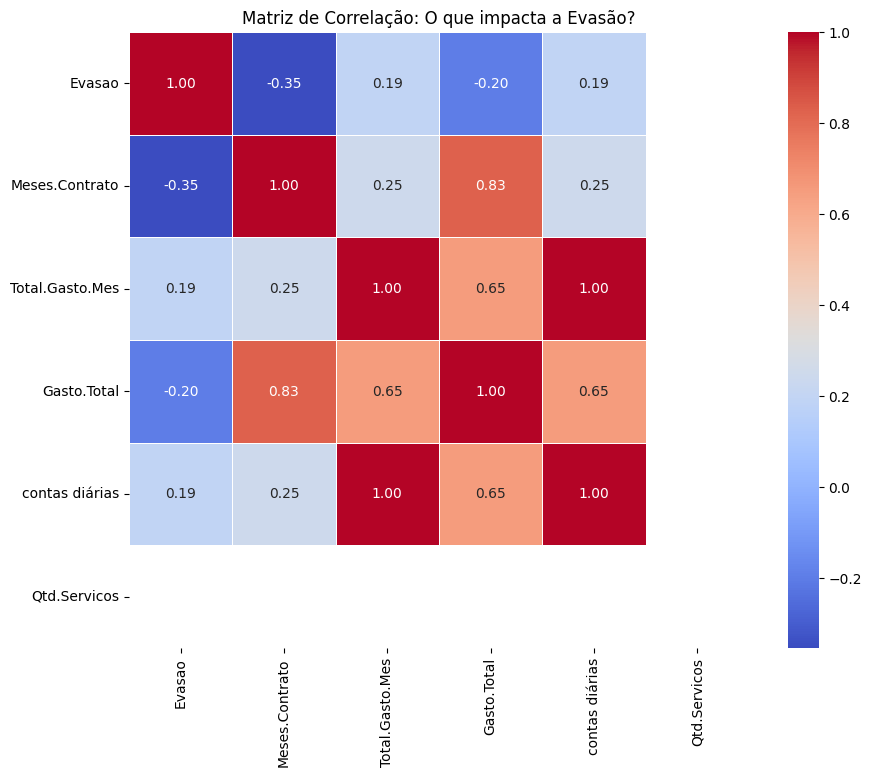

In [ ]:
colunas_interesse = [
    'Evasao', 'Meses.Contrato', 'Total.Gasto.Mes',
    'Gasto.Total', 'contas diárias', 'Qtd.Servicos'
]

df_corr = df.copy()
df_corr['Evasao'] = df_corr['Evasao'].replace({'Sim': 1, 'Não': 0, 'Yes': 1, 'No': 0})

matriz_correlacao = df_corr[colunas_interesse].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)

plt.title('Matriz de Correlação: O que impacta a Evasão?')
plt.show()